# Data Analyst Jobs in U.S.

TODO - The dataset contains information about the spread of Data Analyst jobs in the U.S. by Sector,Location and has a range of Salary and year founded.

The aim is to find which candidate has a higher chance of getting Data Analyst role in the U.S. and to have an idea of the salary range.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

**TODO** - add some explanation here

In [ ]:
!pip install jovian opendatasets --upgrade --quiet

     |████████████████████████████████| 68 kB 3.2 MB/s 


Let's begin by downloading the data, and listing the files within the dataset.

In [ ]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/andrewmvd/data-analyst-jobs'

In [ ]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

The dataset has been downloaded and extracted.

In [ ]:
# Change this
data_dir = './data-analyst-jobs'

In [ ]:
import os
os.listdir(data_dir)

['DataAnalyst.csv']

Let us save and upload our work to Jovian before continuing.

In [ ]:
project_name = "data-analyst-jobs-in-u.s." # change this (use lowercase letters and hyphens only)

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'

## Data Preparation and Cleaning

**TODO** 

1) Dropping the columns those have minimal impact on the data

2) Splitting the column "Location" into two columns "Location" and "Location_code"

3) Splitting the values of Salary range into separate columns(min_sal and max_sal)

4) Splitting the values of Size(Employee) into separate columns(min_emp and max_emp)

5) Replacing None,Unknown,Nan values to 0

6) Converting columns to numeric type

7) Creating for loop to change the maximum employees if only the maximum number is given

8) Splitting the values of Revenue into separate columns(min_Revenue and max_Revenue)

9) Replacing the value "-1" in the column 'Sector' to '(NA)'

10) Creating a copy of the main dataframe to work

11) Getting jobs by states in USA

12) Sectorial data on Major location

In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
main_df=pd.read_csv('./data-analyst-jobs/DataAnalyst.csv')

In [ ]:
main_df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


**1) Dropping the columns those have minimal impact on the data**

In [ ]:
main_df.drop('Unnamed: 0',axis=1,inplace=True)
main_df.drop('Job Description',axis=1,inplace=True)
main_df.drop('Competitors',axis=1,inplace=True)
main_df.drop('Easy Apply',axis=1,inplace=True)

**2) Splitting the column "Location" into two columns "Location" and "Location_code"**

In [ ]:
#location
main_df['Location_code']=main_df['Location'].apply(lambda x : x.split(',')[1])
main_df['Location']=main_df['Location'].apply(lambda x : x.split(',')[0])

**3) Splitting the values of Salary range into separate columns(min_sal and max_sal)**

In [ ]:
#minimum_salary
main_df['min_sal']=main_df['Salary Estimate'].apply(lambda x : x.split('-')[0])
main_df['min_sal']=main_df['min_sal'].str.replace('K','',regex=True)
main_df['min_sal']=main_df['min_sal'].str.replace('$','',regex=True)

#maximum_salary
main_df['max_sal']=main_df['Salary Estimate'].apply(lambda x : x.split('-')[1])
main_df['max_sal']=main_df['max_sal'].apply(lambda x : x.split('(')[0])
main_df['max_sal']=main_df['max_sal'].str.replace('K','',regex=True)
main_df['max_sal']=main_df['max_sal'].str.replace('$','',regex=True)

**4) Splitting the values of Size(Employee) into separate columns(min_emp and max_emp)**

In [ ]:
#minimum_employees
main_df['min_emp']=main_df['Size'].apply(lambda x : x.split(' to ')[0])
main_df['min_emp']=main_df['min_emp'].apply(lambda x : x.split('+')[0])

#maximum_employees
new1=main_df['Size'].str.split(' to ',expand=True)
new2=new1[1].str.split(' ',expand=True)
main_df['max_emp']=new2[0]

**5) Replacing None,Unknown,Nan values to 0**

In [ ]:
#replace None to '0'
main_df.fillna(value='0')
main_df['max_emp'].replace(to_replace=[None], value='0', inplace=True)
main_df['min_emp'].replace(to_replace='-1',value='0', inplace=True) 
main_df['min_emp'].fillna(0)
main_df['min_emp']=main_df['min_emp'].str.replace('Unknown','0',regex=True)

**6) Converting columns to numeric type**

In [ ]:
main_df['min_emp']=pd.to_numeric(main_df['min_emp'])
main_df['max_emp']=pd.to_numeric(main_df['max_emp'])
main_df['max_sal']=pd.to_numeric(main_df['max_sal'])
main_df['min_sal']=pd.to_numeric(main_df['min_sal'])

**7) Creating for loop to change the maximum employees if only the maximum number is given**

In [ ]:
#for loop to change the maximum employees if only the maximum number is given
for i in range(len(main_df['max_emp'])):
    if main_df['max_emp'][i]==0:
        main_df['max_emp'][i]=main_df['min_emp'][i]

/tmp/ipykernel_54/1812685490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df['max_emp'][i]=main_df['min_emp'][i]


**8) Splitting the values of Revenue into separate columns(min_Revenue and max_Revenue)**

In [ ]:
#min_Revenue
main_df['min_Revenue']=main_df['Revenue'].apply(lambda x :x.split('to')[0])
main_df['min_Revenue']=main_df['Revenue'].apply(lambda x :x.split(' ')[0])
main_df['min_Revenue']=main_df['min_Revenue'].str.replace('$','',regex=True)
main_df['min_Revenue']=main_df['min_Revenue'].str.replace('Unknown','0',regex=True)
main_df['min_Revenue']=main_df['min_Revenue'].str.replace('Less','0',regex=True)
main_df['min_Revenue'].str.strip()
main_df['min_Revenue']=main_df['min_Revenue'].str.replace('Unknown / Non-Applicable','0',regex=True)
main_df['min_Revenue']=main_df['min_Revenue'].apply(lambda x:x.replace('Less than 1 million (USD)','0'))
main_df['min_Revenue']=main_df['min_Revenue'].apply(lambda x:x.split('+')[0])
main_df['min_Revenue']=pd.to_numeric(main_df['min_Revenue'])

#max_Revenue
new3=main_df['Revenue'].str.split('to',expand=True)
new4=new3[1].str.split(' ',expand=True)
new4[1]=new4[1].str.replace('$','',regex=True)
main_df['max_Revenue']=new4[1]
main_df['max_Revenue']=main_df['max_Revenue'].fillna(0)
main_df['max_Revenue']=pd.to_numeric(main_df['max_Revenue'])

**9) Replacing the value "-1" in the column 'Sector' to '(NA)'**

In [ ]:
#Sectorial Data
main_df.loc[main_df["Sector"] == "-1", "Sector"] = '(NA)'

**10) Creating a copy of the main dataframe to work**

In [ ]:
working_df=main_df[['Location','Location_code','Founded','Sector','min_sal','max_sal','min_emp','max_emp','min_Revenue','max_Revenue']].copy()
working_df.head()

,Location,Location_code,Founded,Sector,min_sal,max_sal,min_emp,max_emp,min_Revenue,max_Revenue
0,New York,NY,1961,Non-Profit,37.0,66,201,500,100,500
1,New York,NY,1893,Health Care,37.0,66,10000,10000,2,5
2,New York,NY,2003,Information Technology,37.0,66,1001,5000,0,0
3,New York,NY,2002,Information Technology,37.0,66,201,500,50,100
4,New York,NY,2009,"Arts, Entertainment & Recreation",37.0,66,501,1000,100,500


**11) Getting jobs by states in USA**

In [ ]:
url='https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population'

In [ ]:
city_to_state=pd.read_html(url,header=0)
list_city_states=city_to_state[4][['City','State[c]']]
list_city_states['City']=list_city_states['City'].str.split('[',expand=True)[0]

/tmp/ipykernel_54/185993883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list_city_states['City']=list_city_states['City'].str.split('[',expand=True)[0]


In [ ]:
list_city_states['City'].str.strip()
list_city_states['State[c]'].str.strip()

0        New York
1      California
2        Illinois
3           Texas
4         Arizona
          ...    
321    Washington
322      Michigan
323         Texas
324         Idaho
325      Virginia
Name: State[c], Length: 326, dtype: object

In [ ]:
list_city_states.rename(columns = {'City':'Location'}, inplace = True)
list_city_states.head()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Location,State[c]
0,New York,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Phoenix,Arizona


In [ ]:
merged_df=pd.merge(working_df, list_city_states, on='Location')
merged_df

,Location,Location_code,Founded,Sector,min_sal,max_sal,min_emp,max_emp,min_Revenue,max_Revenue,State[c]
0,New York,NY,1961,Non-Profit,37.0,66,201,500,100,500,New York
1,New York,NY,1893,Health Care,37.0,66,10000,10000,2,5,New York
2,New York,NY,2003,Information Technology,37.0,66,1001,5000,0,0,New York
3,New York,NY,2002,Information Technology,37.0,66,201,500,50,100,New York
4,New York,NY,2009,"Arts, Entertainment & Recreation",37.0,66,501,1000,100,500,New York
...,...,...,...,...,...,...,...,...,...,...,...
1836,Aurora,CO,1991,Retail,57.0,100,501,1000,0,0,Illinois
1837,Aurora,CO,1999,Information Technology,78.0,104,501,1000,50,100,Colorado
1838,Aurora,CO,1999,Information Technology,78.0,104,501,1000,50,100,Illinois
1839,Aurora,CO,-1,(NA),78.0,104,0,0,-1,0,Colorado


In [ ]:
Location_counts=merged_df['State[c]'].value_counts().rename_axis('STATE').reset_index(name='Counts')

In [ ]:
Location_counts['log']=np.log10(Location_counts['Counts'])
Location_counts.head()

,STATE,Counts,log
0,California,438,2.641474
1,Texas,382,2.582063
2,New York,310,2.491362
3,Illinois,135,2.130334
4,Arizona,103,2.012837


**12) Sectorial data on Major location**

In [ ]:
CAL_df = merged_df[merged_df['State[c]']=='California']
CAL_df.head()

,Location,Location_code,Founded,Sector,min_sal,max_sal,min_emp,max_emp,min_Revenue,max_Revenue,State[c]
310,Fairfield,NJ,-1,(NA),37.0,66,1,50,0,0,California
311,Fairfield,NJ,-1,"Construction, Repair & Maintenance",27.0,52,1,50,0,0,California
379,Visalia,CA,-1,Education,47.0,81,1,50,1,5,California
424,Los Angeles,CA,1996,Information Technology,55.0,103,1001,5000,500,1,California
425,Los Angeles,CA,2014,Information Technology,55.0,103,1,50,1,5,California


In [ ]:
TX_df = merged_df[merged_df['State[c]']=='Texas']
TX_df.head()

,Location,Location_code,Founded,Sector,min_sal,max_sal,min_emp,max_emp,min_Revenue,max_Revenue,State[c]
548,Pasadena,CA,1971,Finance,37.0,70,501,1000,0,0,Texas
550,Pasadena,CA,-1,(NA),37.0,70,1,50,0,0,Texas
552,Pasadena,CA,1938,Finance,37.0,70,201,500,2,5,Texas
554,Pasadena,CA,1945,Health Care,35.0,45,10000,10000,10,0,Texas
556,Pasadena,CA,-1,(NA),35.0,45,0,0,0,0,Texas


In [ ]:
NY_df = merged_df[merged_df['State[c]']=='New York']
NY_df.head()

,Location,Location_code,Founded,Sector,min_sal,max_sal,min_emp,max_emp,min_Revenue,max_Revenue,State[c]
0,New York,NY,1961,Non-Profit,37.0,66,201,500,100,500,New York
1,New York,NY,1893,Health Care,37.0,66,10000,10000,2,5,New York
2,New York,NY,2003,Information Technology,37.0,66,1001,5000,0,0,New York
3,New York,NY,2002,Information Technology,37.0,66,201,500,50,100,New York
4,New York,NY,2009,"Arts, Entertainment & Recreation",37.0,66,501,1000,100,500,New York


In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'

## Exploratory Analysis and Visualization

**TODO** - 

1) Analyzing the data to get a better understanding of the Data Analytics job distribution across U.S 

2) Finding which sector has the highest scope for a Data Analyst

3) Find the suitable Sector based on the location with high demand which will increase the chance of getting the job 

4) To get a approximate salary figure for the Data analyst role 




Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 8.5 MB/s eta 0:00:01


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.6 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 57.0 MB/s eta 0:00:01


In [ ]:
import seaborn as sns
import plotly as py
import geopandas as gpd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO - SECTORIAL WISE JOB DISTRIBUTION**

AttributeError: ignored

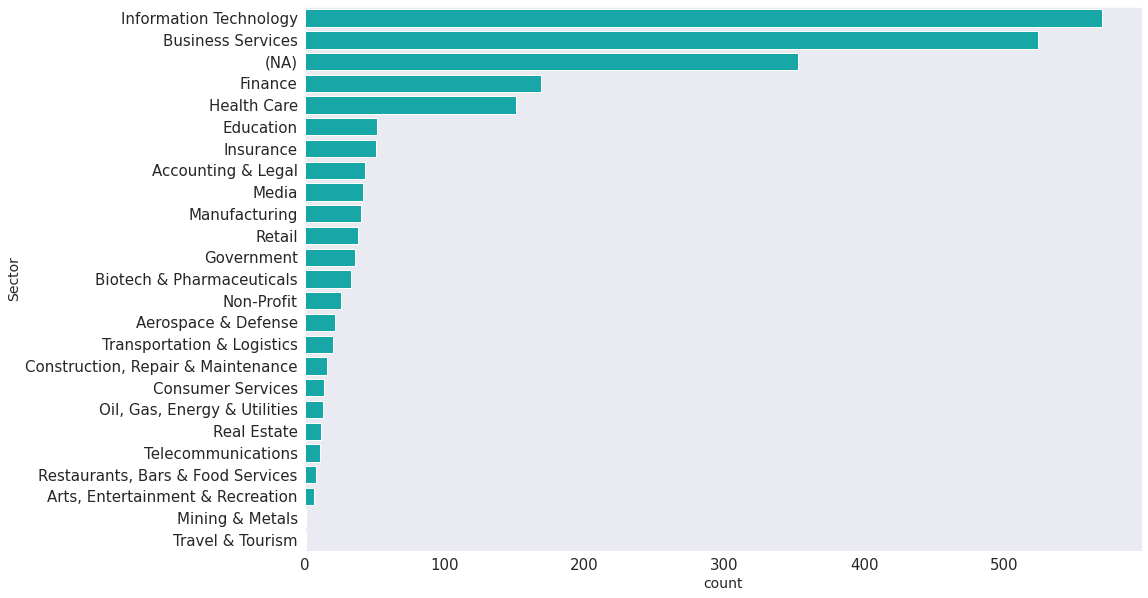

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
ax=sns.countplot(y='Sector',data=working_df,order = working_df['Sector'].value_counts().index,color='c')
ax.grid(False)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Information Technology and Business Services accounts to almost 50% of the total contribution

**TODO** - **Salary Distribution**

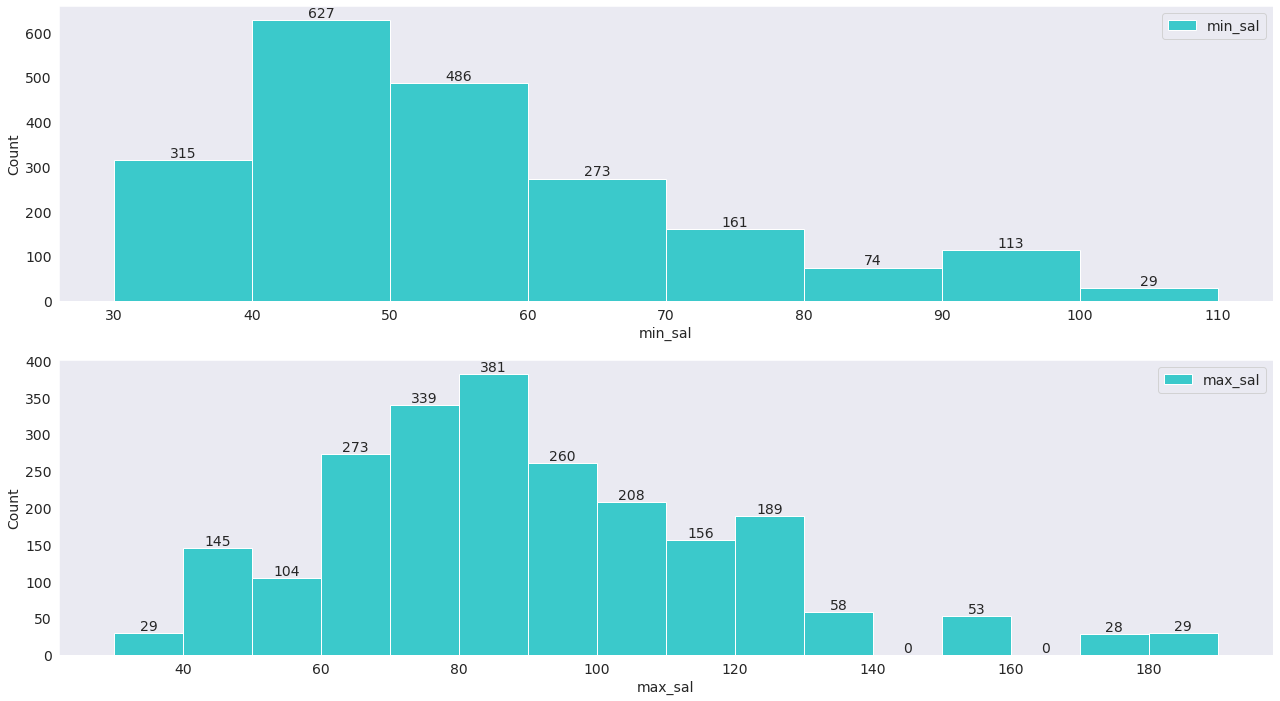

In [ ]:
fig, axes=plt.subplots(2,figsize=(18, 10))
sns.histplot(ax=axes[0],data=working_df,x='min_sal',bins=np.arange(30,120,10), label="min_sal",color='c')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.histplot(ax=axes[1],data=working_df,x='max_sal',bins=np.arange(30,200,10),label="max_sal",color='c')

for i in axes[1].containers:
    axes[1].bar_label(i,)

axes[0].legend()
axes[0].grid(False)
axes[1].legend()
axes[1].grid(False)
fig.tight_layout()
plt.show()

The minimum salary ranges from  24𝐾𝑡𝑜 113K

The maximum number of positions is available at  40𝐾− 50K

The maximum salary ranges from  30𝐾𝑡𝑜 190K

The maximum number of positions is available at  80𝐾− 90K

**TODO** - **Number of Companies by year**

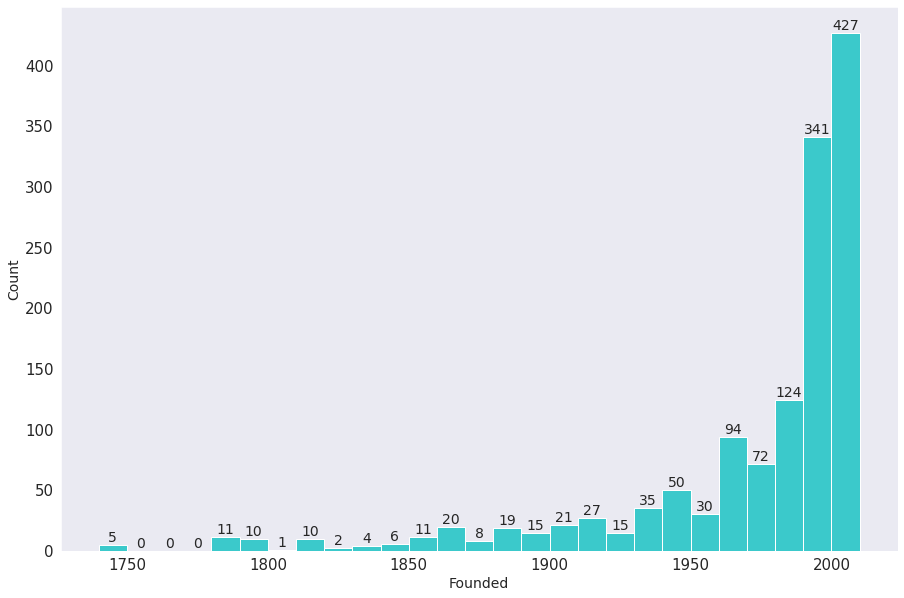

In [ ]:
ax=sns.histplot(working_df.Founded,bins=np.arange(1740,2020,10),color='c')
ax.grid(False)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
    
for i in ax.containers:
    ax.bar_label(i,)


Almost 50%(606) of the companies were added in the 2000's

**TODO - Job distribution by State**

New York, California and Texas have high number of companies in the Information Technology and Business Services Sector

Since Information Technology and Business Services Sector has a huge scope for analytics there is a  high demand for Data Analyst.

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    us_cities = json.load(response)
#us_cities=json.load(open('USA_states.json','r'))

In [ ]:
gdf = gpd.GeoDataFrame.from_features(us_cities["features"])
gdf.head()
Location_counts['STATE'].isin(gdf['name'])

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
Name: STATE, dtype: bool

In [ ]:
state_id_map = {}
for feature in us_cities["features"]:
    feature["id_no"] = feature['id']
    state_id_map[feature["properties"]["name"]] = feature["id_no"]

In [ ]:
Location_counts["id_no"] = Location_counts["STATE"].apply(lambda x: state_id_map[x])

In [ ]:
Location_counts.head()

,STATE,Counts,log,id_no
0,California,438,2.641474,06
1,Texas,382,2.582063,48
2,New York,310,2.491362,36
3,Illinois,135,2.130334,17
4,Arizona,103,2.012837,04


In [ ]:
fig = px.choropleth_mapbox(
    Location_counts,
    color_continuous_scale='Tealgrn',
    locations="id_no",
    geojson=us_cities,
    color="Counts",
    hover_name="STATE",
    hover_data=["Counts"],
    title="Job Density",
    mapbox_style="stamen-watercolor",
    zoom=2,
    opacity=0.75,
    center={"lat": 37, "lon": -97}
    )
fig.show()

**TODO - JOB DISTRIBUTION IN MAJOR LOCATIONS(CALIFORNIA & TEXAS)**

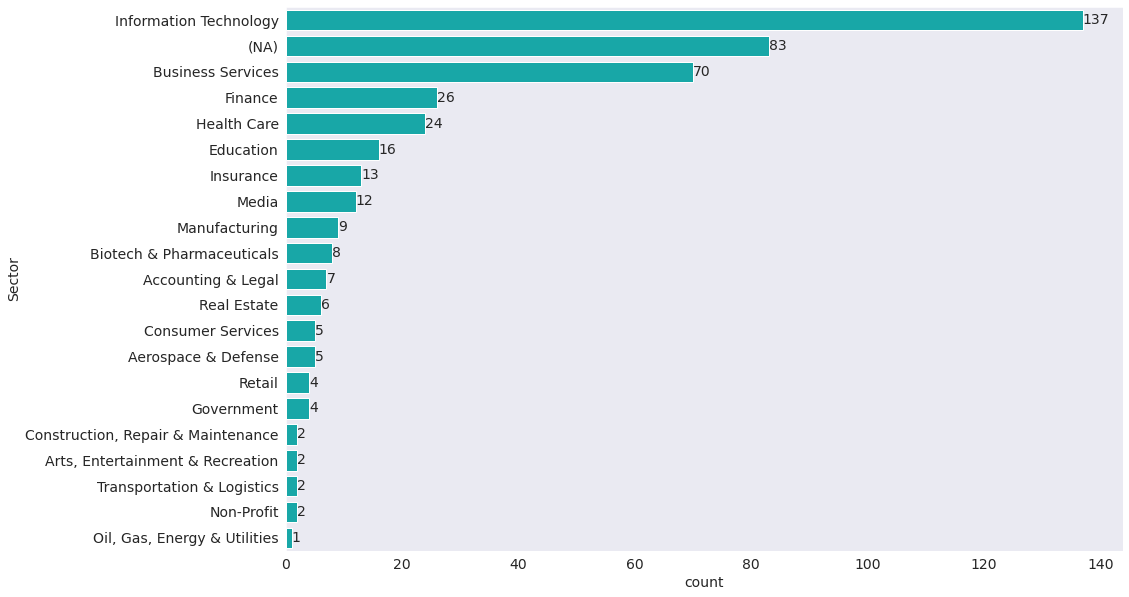

In [ ]:
#California

ax=sns.countplot(y='Sector',data=CAL_df,color='c',order = CAL_df['Sector'].value_counts().index)
ax.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

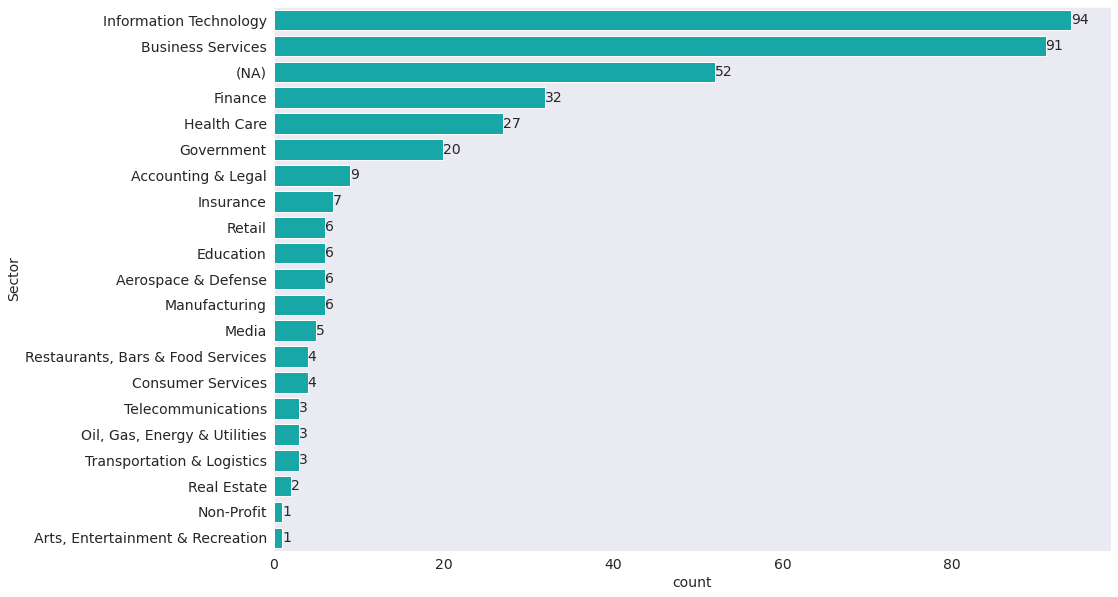

In [ ]:
#Texas

ax=sns.countplot(y='Sector',data=TX_df,order = TX_df['Sector'].value_counts().index,color='c')
ax.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

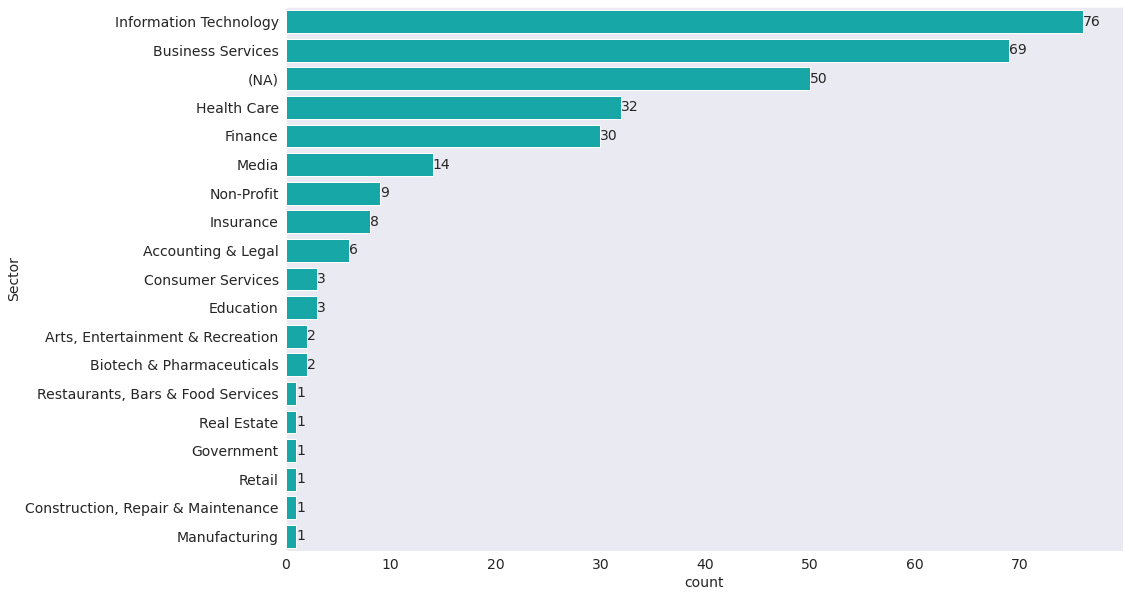

In [ ]:
#New York
ax=sns.countplot(y='Sector',data=NY_df,order = NY_df['Sector'].value_counts().index,color='c')
ax.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

New York, California and Texas have high number of companies in the Information Technology and Business Services Sector

Since Information Technology and Business Services Sector has a huge scope for analytics there is a high demand for Data Analyst.

Let us save and upload our work to Jovian before continuing

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'

## Asking and Answering Questions

Trying to find the sector which have high chances to get a Data analyst Role.

Finding jobs by location of our choice.

Analyzing the time frame which is a milestone in Data Analysis

Getting to know the best salary package which would help in salary negotiation.





#### Q1: Which Sector has the highest number jobs for Data Analyst?

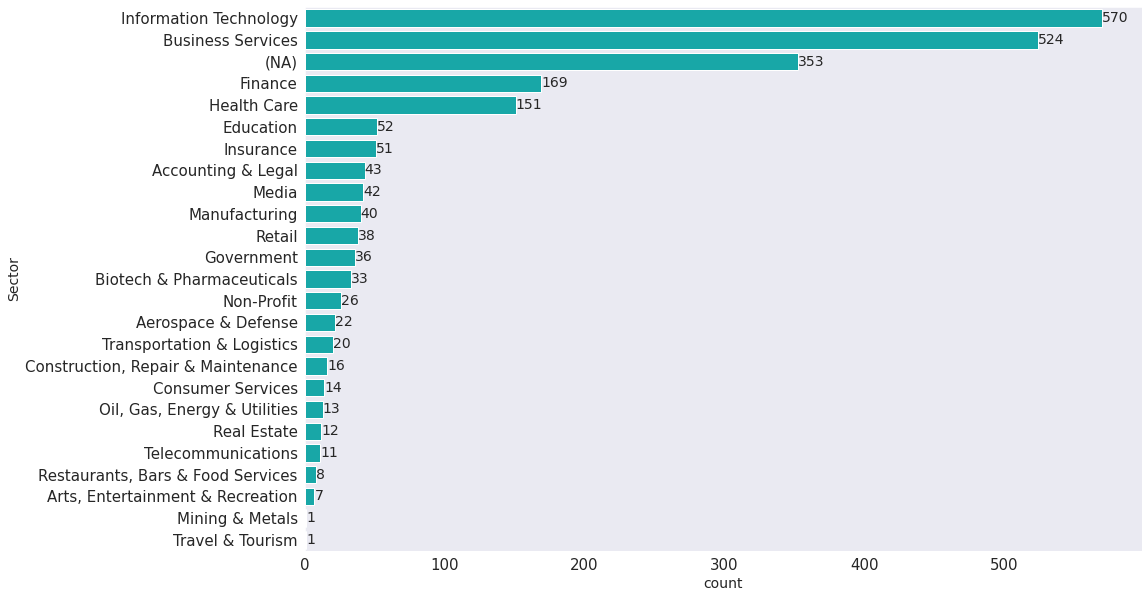

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15, 10)
ax=sns.countplot(y='Sector',data=working_df,order = working_df['Sector'].value_counts().index,color='c')
ax.grid(False)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
for i in ax.containers:
    ax.bar_label(i,)

Information Technology and Business Services has the highest number of jobs for Data Analyst

Information Technology and Business Services have positions of 570 and 524 respectively for Data Analysts

#### Q2: Which States in the US has high demand for Data Analysts?

In [ ]:
fig = px.choropleth_mapbox(
    Location_counts,
    color_continuous_scale='Tealgrn',
    locations="id_no",
    geojson=us_cities,
    color="Counts",
    hover_name="STATE",
    hover_data=["Counts"],
    title="Job Density",
    mapbox_style="stamen-watercolor",
    zoom=2,
    opacity=0.75,
    center={"lat": 37, "lon": -97}
    )
fig.show()

California , Texas and New York have a high demand for Data Analyst

California , Texas and New York have 438,382 and 310 positions respectively for Data Analysts 

Perhaps applying in California, Texas and New York have a high chance of landing a Data Analyst job in the U.S.

#### Q3: Why does California , Texas and New York have a demand for Data Analyst?

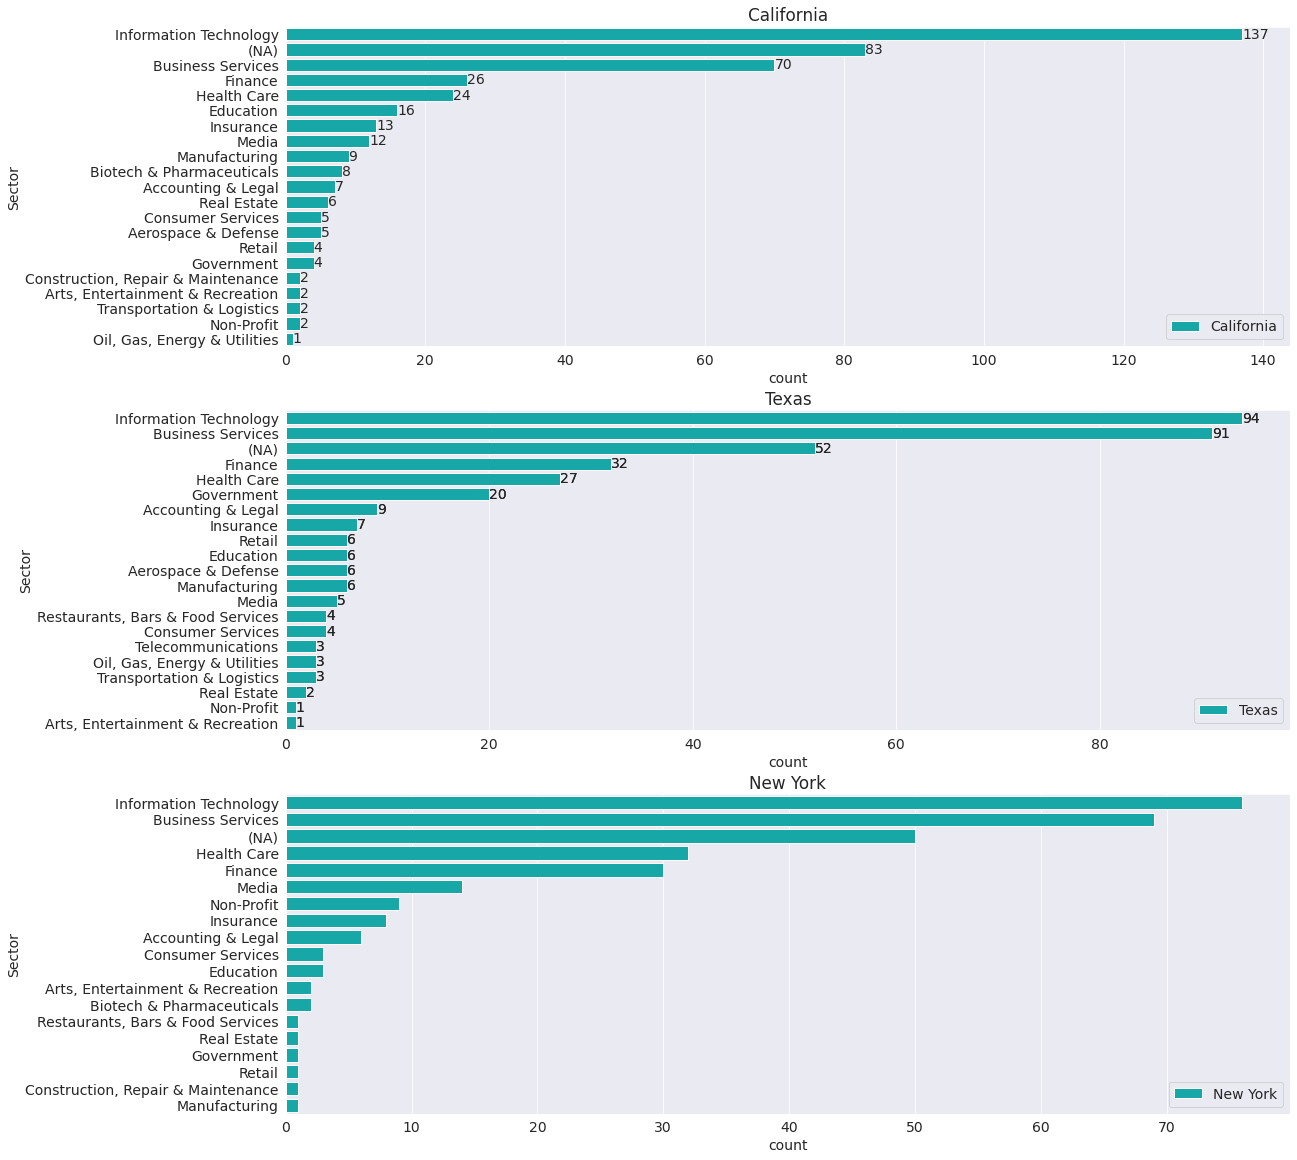

In [ ]:
matplotlib.rcParams['figure.figsize'] = (18, 20)
fig,axs=plt.subplots(3,1)

sns.countplot(ax=axs[0],y='Sector',data=CAL_df,color='c',order = CAL_df['Sector'].value_counts().index,label='California')
sns.countplot(ax=axs[1],y='Sector',data=TX_df,color='c',order = TX_df['Sector'].value_counts().index,label='Texas')
sns.countplot(ax=axs[2],y='Sector',data=NY_df,color='c',order = NY_df['Sector'].value_counts().index,label='New York')

for i in axs[0].containers:
    axs[0].bar_label(i,)
for i in axs[1].containers:
    axs[1].bar_label(i,)
for i in axs[1].containers:
    axs[1].bar_label(i,)

axs[0].title.set_text('California')
axs[1].title.set_text('Texas')
axs[2].title.set_text('New York')
axs[0].legend()
axs[1].legend()
axs[2].legend()

New York, California and Texas have high number of companies in the Information Technology and Business Services Sector

Since Information Technology and Business Services Sector has a huge scope for analytics there is a high demand for Data Analyst.

#### Q4: What is the range of minimum/maximum salary offered for a Data Analyst?And which salary range has high number of positions?

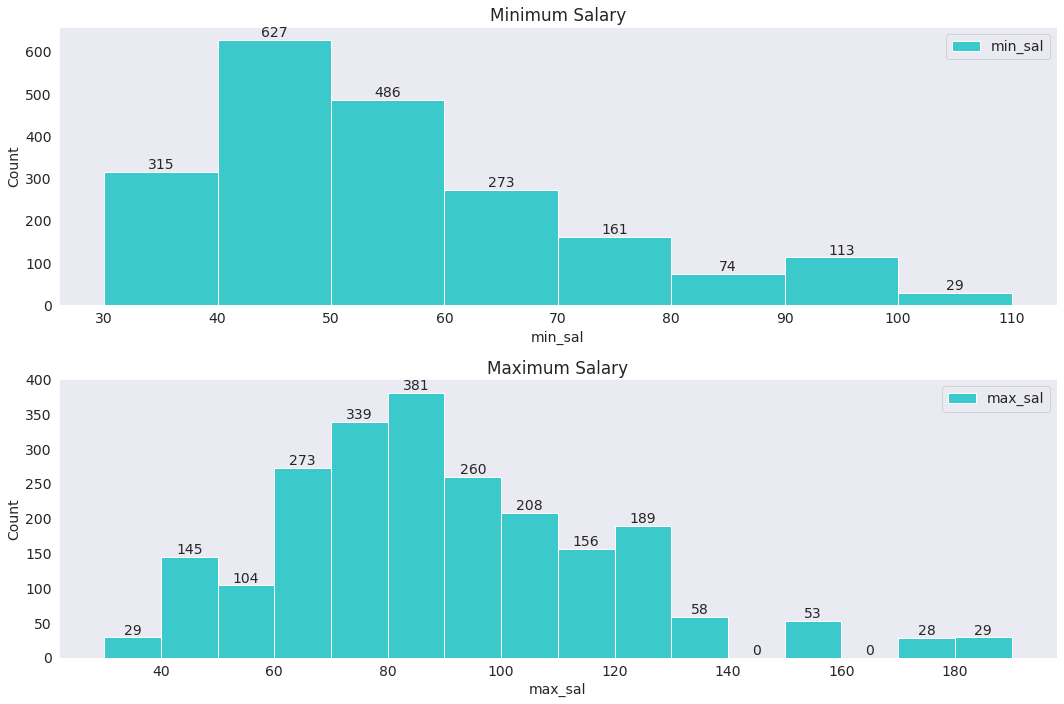

In [ ]:
fig, axes=plt.subplots(2,figsize=(15, 10))
sns.histplot(ax=axes[0],data=working_df,x='min_sal',bins=np.arange(30,120,10), label="min_sal",color='c')
for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.histplot(ax=axes[1],data=working_df,x='max_sal',bins=np.arange(30,200,10),label="max_sal",color='c')

for i in axes[1].containers:
    axes[1].bar_label(i,)

axes[0].legend()
axes[0].grid(False)
axes[0].title.set_text('Minimum Salary')
axes[1].legend()
axes[1].grid(False)
axes[1].title.set_text('Maximum Salary')
fig.tight_layout()
plt.show()

***Minimum Salary data***


The minimum salary ranges from $24K - 113K  

The maximum number of positions is available at  $40K- 50K


***Maximum Salary data***

The maximum salary ranges from  $30𝐾 - 190K

The maximum number of positions is available at  $80𝐾 − 90K

#### Q5: Can you tell the time spell in which majority of companies were founded?

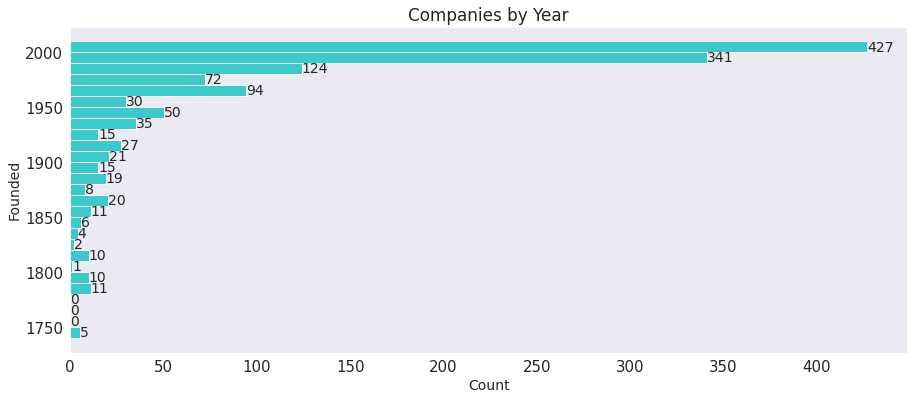

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15,6)

ax=sns.histplot(y=working_df.Founded,bins=np.arange(1740,2020,10),color='c')
ax.grid(False)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.title.set_text('Companies by Year')   
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
company_count=working_df[working_df['Founded']>2000].copy()
company_count_df=company_count['Founded'].value_counts().rename_axis('year').reset_index(name='companies')

In [ ]:
values=company_count_df['companies'].sum()
values

606

Almost **606  companies** were founded between 2000-2020

This period has generated huge number of jobs and increase in demand for Data Analysis

Let us save and upload our work to Jovian before continuing.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

Information Technology and Business Services have positions of 570 and 524 respectively for Data Analysts.

**A candidate** with a background from either **Information Technology (or) Business Services** has a high chance for the role in the U.S.

Especially **California, Texas and New York** have 438,382 and 310 positions respectively for Data Analysts and we can expect a good demand for Analysts.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

https://youtu.be/aJmaw3QKMvk - Plotly Tutorial

https://www.geeksforgeeks.org/pandas-tutorial/?ref=lbp - This is a pretty easy way to check the syntax

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dhanasekar1620/data-analyst-jobs-in-u-s" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s


'https://jovian.ai/dhanasekar1620/data-analyst-jobs-in-u-s'